# GIS routing

We won't introduce any new concept/algorithm here.  

Just a new map but we will perform all the algorithms in the same notebook so you could see the difference with respect to time/efficiency and see how the **nodes are expanded** in each of the previous algorithm in real-time.

# Getting the map

In [1]:
import osmnx as ox
from IPython.display import IFrame, HTML
import matplotlib.animation as animation
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import time
from collections import deque
import networkx as nx
from problem import *
from utils import *

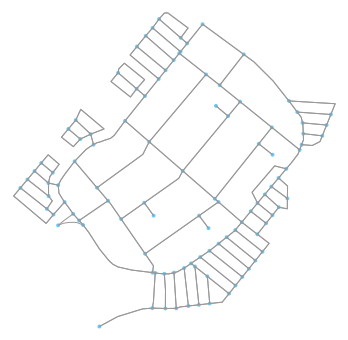

In [2]:
G = ox.graph_from_place('toronto premium outlets')
fig, ax = ox.plot_graph(G)

In [3]:
graph_map = ox.plot_graph_folium(G, edge_width=2)
filepath = './data/graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

let's find two vertices to be our source and destination

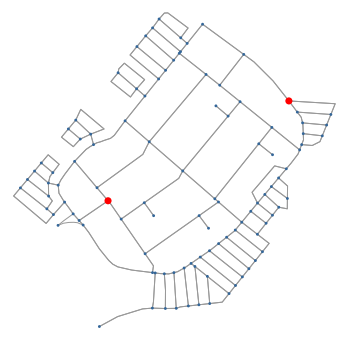

In [4]:
nc = ['r' if node == 6655397492 or node == 2493811210 else '#336699' for node in G.nodes()]
ns = [50 if node == 6655397492 or node == 2493811210 else 8 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

So let's state our new problem, I want to get from Starbucks to the parking on the other side of the outlet. But I want to be cool and use graph search algorithms and animate them, let's get to work then.

In [5]:
%%capture
source(Node)
# first define the origin/source nodes as Node
origin = Node(graph = G, node = G[6655397492], osmid = 6655397492, distance = 0, parent = None)
destination = Node(graph = G, node = G[2493811210], osmid = 2493811210)

### Breadth First Search
please note `colors` array which serves as stamp for the current state of the traversing and expansion of the nodes, would be used in animations.

In [6]:
bar = tqdm(total=len(G))
colors = []
route = []
frontier = deque([origin])
explored = set()
found = False
while frontier and not found:
    bar.update(1); time.sleep(0.1)
    node = frontier.popleft()
    explored.add(node)
    if node == destination:
        route, cost = node.path()
        found = True
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                route, cost = child.path()
                found = True
            frontier.append(child)
    frontierOsmid = [node.osmid for node in explored]
    colornow = [1 if node in frontierOsmid else 6 for node in G.nodes()]
    colors.append(colornow)

bar.close()
print(route)

 40%|████      | 42/105 [00:04<00:06,  9.81it/s]

[6655397492, 6655397503, 6655397505, 6655397506, 6655397508, 6655397494, 2493811210]


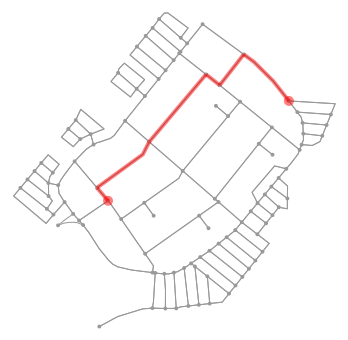

In [7]:
fig, ax = ox.plot_graph_route(G, route)

Focus on how breadth first search traverse on the graph and how it expands on all directions and waste time

In [8]:
%%capture
ani = animate_simple(G, np.array(colors))

In [9]:
HTML(ani.to_html5_video())